In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

import pickle
import json

In [8]:
data=load_iris()
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
data.target_names
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [9]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [38]:
df['species']=data.target
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
145        2  
146        2  
147        2  
148        2  
149        2

In [12]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [13]:
df.shape

(150, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [16]:
X = df.drop(columns=['species'])
X.shape

(150, 4)

In [17]:
y = df['species']
y.shape

(150,)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [19]:
model = LogisticRegression(multi_class='ovr',solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [20]:
y_pred = model.predict(X_test)

In [28]:
y_pred[15:20]

array([1, 0, 1, 2, 1])

In [22]:
y_test[15:20]

54     1
41     0
96     1
144    2
89     1
Name: species, dtype: int32

In [23]:
model.score(X_test,y_test)

0.9333333333333333

In [24]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

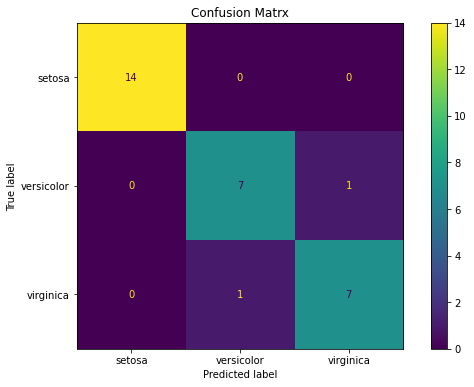

In [25]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =plot_confusion_matrix(model, X_test, y_test, display_labels= data.target_names, ax = ax)
disp.confusion_matrix

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [27]:
with open("Logistic_model.pkl","wb") as f:
    pickle.dump(model,f)

In [31]:
sepal_length=4.6
sepal_width=3.4
petal_length=1.4
petal_width=0.3

In [30]:
test_array = np.zeros(len(X.columns))
test_array

array([0., 0., 0., 0.])

In [32]:
test_array[0]=sepal_length
test_array[1]=sepal_width
test_array[2]=petal_length
test_array[3]=petal_width

test_array

array([4.6, 3.4, 1.4, 0.3])

In [34]:
model.predict([test_array])

array([0])

In [35]:
y_test.head(1)

6    0
Name: species, dtype: int32